In [5]:
# First, I will load the packages I will be using.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd


In [6]:
# Now, I will import the data and take a look.
df = pd.read_csv(r'/Users/rachelfilippone/Desktop/SVI_2020_countydata.csv')
df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,1,Alabama,AL,1001,Autauga,1001,"Autauga County, Alabama",594.455838,55639,0,...,1.2,0.3,0.3,0.2,0.0,0.1,2.0,0.7,0.2,0.3
1,1,Alabama,AL,1003,Baldwin,1003,"Baldwin County, Alabama",1589.835294,218289,0,...,0.9,0.2,0.6,0.2,0.0,0.1,1.9,0.4,0.3,0.2
2,1,Alabama,AL,1005,Barbour,1005,"Barbour County, Alabama",885.007618,25026,0,...,0.5,0.1,0.3,0.3,0.0,0.1,1.3,0.6,0.6,0.4
3,1,Alabama,AL,1007,Bibb,1007,"Bibb County, Alabama",622.469288,22374,0,...,0.3,0.4,0.1,0.1,0.0,0.2,0.4,0.3,0.0,0.2
4,1,Alabama,AL,1009,Blount,1009,"Blount County, Alabama",644.890375,57755,0,...,0.4,0.1,0.1,0.1,0.1,0.1,1.8,0.3,0.3,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56,Wyoming,WY,56037,Sweetwater,56037,"Sweetwater County, Wyoming",10426.975770,43352,0,...,0.7,0.3,1.0,0.4,0.0,0.1,2.2,0.8,0.2,0.3
3139,56,Wyoming,WY,56039,Teton,56039,"Teton County, Wyoming",3996.846846,23356,0,...,1.4,0.8,0.2,0.2,0.1,0.1,1.0,0.6,0.6,0.8
3140,56,Wyoming,WY,56041,Uinta,56041,"Uinta County, Wyoming",2081.719808,20374,0,...,0.2,0.2,0.5,0.3,0.0,0.2,2.2,0.4,0.0,0.2
3141,56,Wyoming,WY,56043,Washakie,56043,"Washakie County, Wyoming",2238.678265,7933,0,...,0.0,0.4,0.4,0.4,0.0,0.4,3.2,0.5,0.4,0.4


In [7]:
# This is tidy data, with each row representing a county. There are 3143 rows and 158 columns in the full dataset. 

In [9]:
# Fortunately, the dataset I downloaded was already cleaned, so there should be no missing values, 
# but I will still verify this by checking for missing values

df.isna().sum()

# I do not see any missing data.

ST              0
STATE           0
ST_ABBR         0
STCNTY          0
COUNTY          0
               ..
MP_NHPI         0
EP_TWOMORE      0
MP_TWOMORE      0
EP_OTHERRACE    0
MP_OTHERRACE    0
Length: 158, dtype: int64

In [10]:
df.F_MOBILE

0       0
1       0
2       1
3       1
4       0
       ..
3138    0
3139    0
3140    0
3141    0
3142    0
Name: F_MOBILE, Length: 3143, dtype: int64

In [11]:
# Filter to focus on counties in Indiana.
df_indiana = df[df['STATE'] == 'Indiana']

df_indiana

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
698,18,Indiana,IN,18001,Adams,18001,"Adams County, Indiana",338.926319,35544,0,...,0.3,0.1,0.0,0.1,0.0,0.1,0.5,0.2,0.3,0.4
699,18,Indiana,IN,18003,Allen,18003,"Allen County, Indiana",657.300160,375520,0,...,4.2,0.1,0.1,0.1,0.0,0.1,3.5,0.3,0.2,0.1
700,18,Indiana,IN,18005,Bartholomew,18005,"Bartholomew County, Indiana",406.939480,83280,0,...,7.9,0.3,0.1,0.1,0.0,0.1,2.2,0.4,0.5,0.4
701,18,Indiana,IN,18007,Benton,18007,"Benton County, Indiana",406.417320,8695,0,...,0.1,0.1,0.0,0.4,0.1,0.1,1.6,0.3,0.0,0.4
702,18,Indiana,IN,18009,Blackford,18009,"Blackford County, Indiana",165.081542,11926,0,...,0.3,0.4,0.2,0.3,0.0,0.3,1.9,0.5,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,18,Indiana,IN,18175,Washington,18175,"Washington County, Indiana",513.686736,27942,0,...,0.3,0.1,0.0,0.1,0.0,0.1,1.5,0.2,0.0,0.1
786,18,Indiana,IN,18177,Wayne,18177,"Wayne County, Indiana",401.754293,66176,0,...,1.3,0.2,0.1,0.1,0.0,0.1,2.9,0.6,0.3,0.3
787,18,Indiana,IN,18179,Wells,18179,"Wells County, Indiana",368.086973,28010,0,...,0.4,0.3,0.2,0.2,0.0,0.1,1.8,0.5,0.0,0.1
788,18,Indiana,IN,18181,White,18181,"White County, Indiana",505.138750,24163,0,...,0.3,0.2,0.6,0.2,0.0,0.1,0.9,0.3,0.0,0.1


In [12]:
# Check the data types in the dataframe.
df.dtypes

ST                int64
STATE            object
ST_ABBR          object
STCNTY            int64
COUNTY           object
                 ...   
MP_NHPI         float64
EP_TWOMORE      float64
MP_TWOMORE      float64
EP_OTHERRACE    float64
MP_OTHERRACE    float64
Length: 158, dtype: object

<Figure size 2000x3000 with 0 Axes>

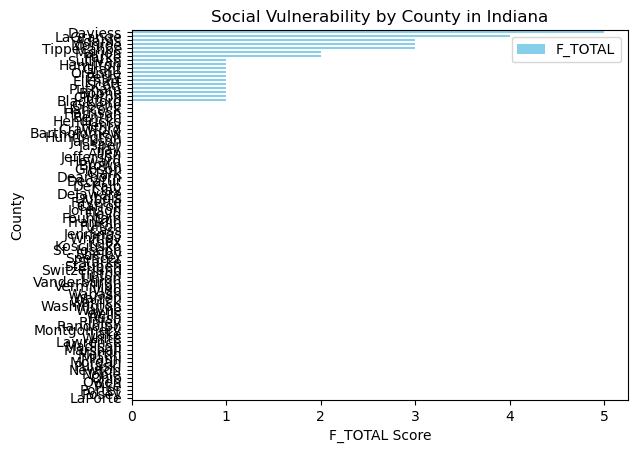

In [13]:
# Plot the overall social vulnerability score for counties in Indiana
plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.25)
plt.tight_layout()

df_indiana.sort_values('F_TOTAL').plot(kind='barh', x='COUNTY', y='F_TOTAL', color='skyblue')

plt.xlabel('F_TOTAL Score')
plt.ylabel('County')
plt.title('Social Vulnerability by County in Indiana')

plt.show()

# That looks very difficult to see. Let's try a choropleth.

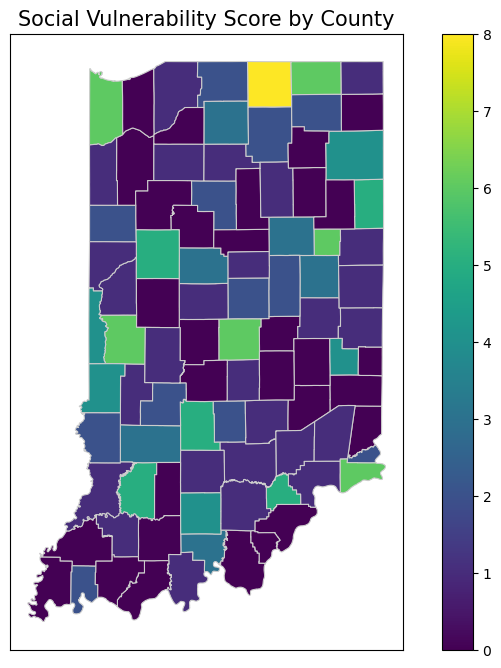

In [14]:
# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Plot SV Score
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_TOTAL_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Social Vulnerability Score by County', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])
plt.show()

/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/468766254.py:14: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




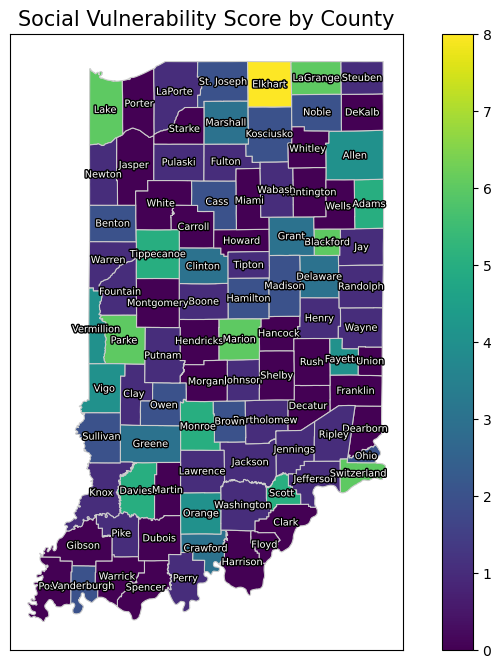

In [80]:
import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Plot SV Score
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_TOTAL_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=7, 
                       color='white')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='black')])

plt.title('Social Vulnerability Score by County', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/1131025457.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




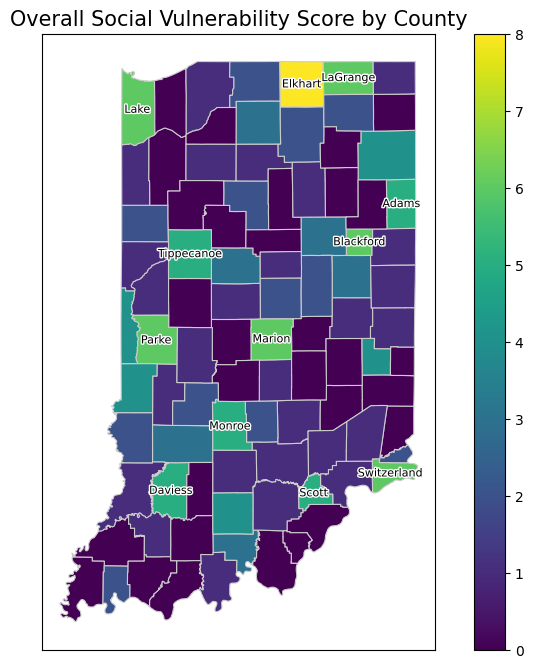

In [100]:
### IMPROVE LABELING

import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Select counties where F_TOTAL_map is greater than 4
merged_selected = merged[merged['F_TOTAL_map'] > 4]

# Plot SV Score
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_TOTAL_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines for selected counties
for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=8, 
                       color='black')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])

plt.title('Overall Social Vulnerability Score by County', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/3769477841.py:17: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




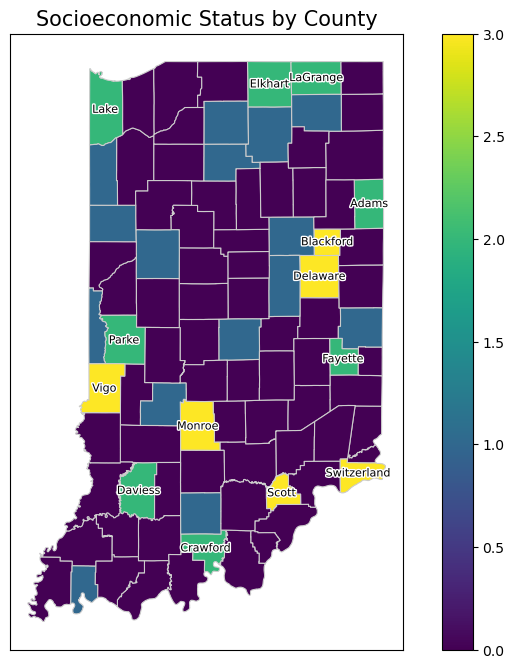

In [99]:
### THEME 1: Socioeconomic Status

import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Select counties where F_THEME1_map is greater than 1.5
merged_selected = merged[merged['F_THEME1_map'] > 1.5]

# Plot Socioeconomic Status
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_THEME1_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines for selected counties
for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=8, 
                       color='black')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])

plt.title('Socioeconomic Status by County', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/74497549.py:19: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




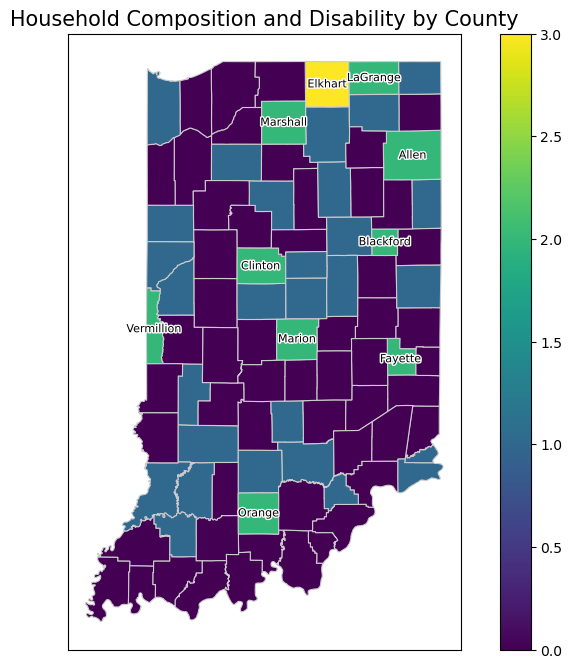

In [101]:
### THEME 2: Household Composition and Disability by County

import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Select counties where F_THEME2_map is greater than 1.5
merged_selected = merged[merged['F_THEME2_map'] > 1.5]

# Plot Socioeconomic Status
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_THEME2_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines for selected counties
for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=8, 
                       color='black')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])

plt.title('Household Composition and Disability by County', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/1237972420.py:19: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




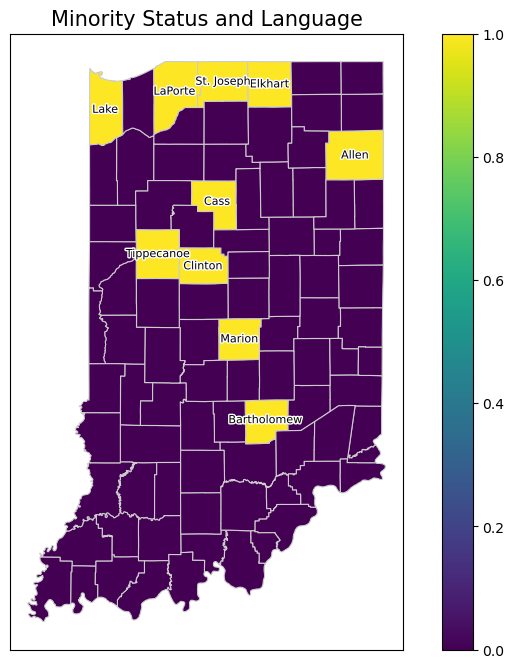

In [102]:
### THEME 3: Minority Status and Language

import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Select counties where F_THEME3_map is greater than 0.6
merged_selected = merged[merged['F_THEME3_map'] > 0.6]

# Plot Socioeconomic Status
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_THEME3_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines for selected counties
for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=8, 
                       color='black')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])

plt.title('Minority Status and Language', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/729742503.py:19: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




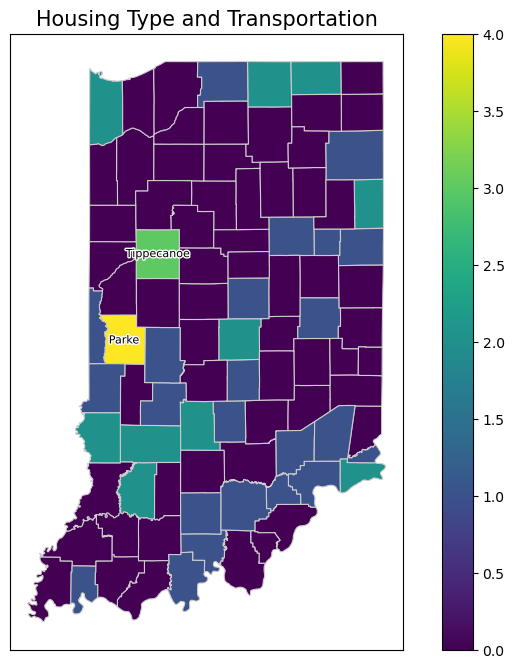

In [103]:
### THEME 4: Housing Type and Transportation

import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Select counties where F_THEME4_map is greater than 2
merged_selected = merged[merged['F_THEME4_map'] > 2]

# Plot Socioeconomic Status
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_THEME4_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines for selected counties
for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=8, 
                       color='black')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])

plt.title('Housing Type and Transportation', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/2921479465.py:21: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




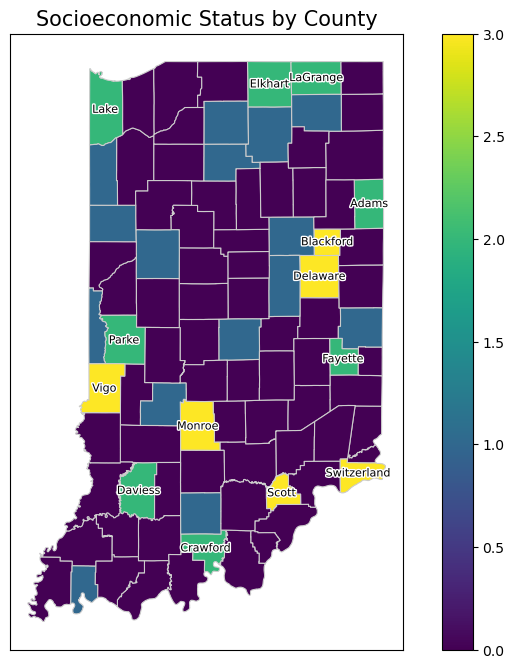

/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/2921479465.py:58: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




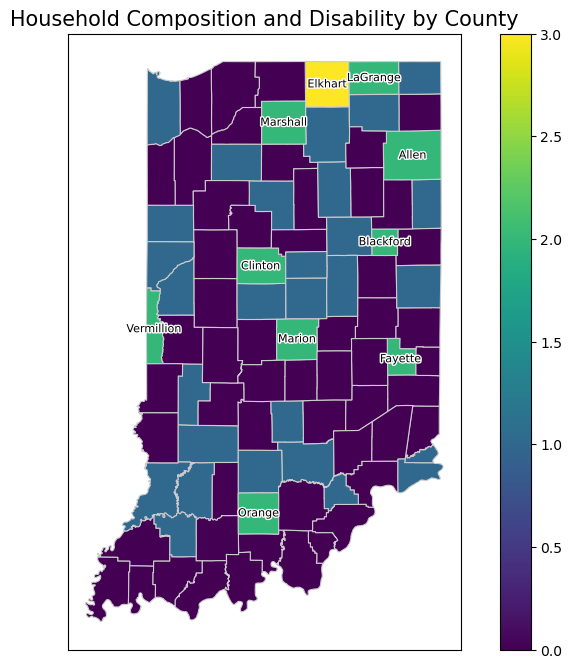

/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/2921479465.py:95: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




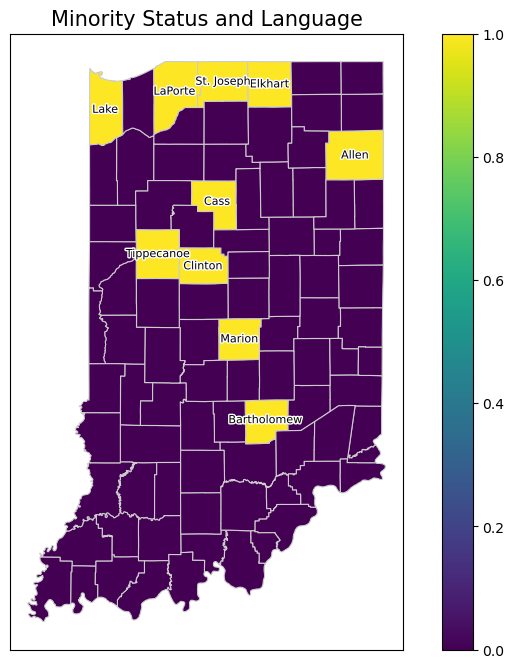

In [105]:
### ALL 4 THEMES:

### THEME 1: Socioeconomic Status

import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Select counties where F_THEME1_map is greater than 1.5
merged_selected = merged[merged['F_THEME1_map'] > 1.5]

# Plot Socioeconomic Status
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_THEME1_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines for selected counties
for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=8, 
                       color='black')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])

plt.title('Socioeconomic Status by County', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()

### THEME 2: Household Composition and Disability by County

import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Select counties where F_THEME2_map is greater than 1.5
merged_selected = merged[merged['F_THEME2_map'] > 1.5]

# Plot Socioeconomic Status
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_THEME2_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines for selected counties
for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=8, 
                       color='black')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])

plt.title('Household Composition and Disability by County', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()

### THEME 3: Minority Status and Language

import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Select counties where F_THEME3_map is greater than 0.6
merged_selected = merged[merged['F_THEME3_map'] > 0.6]

# Plot Socioeconomic Status
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_THEME3_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines for selected counties
for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=8, 
                       color='black')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])

plt.title('Minority Status and Language', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()

### THEME 4: Housing Type and Transportation

import matplotlib.patheffects as pe

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Select counties where F_THEME4_map is greater than 2
merged_selected = merged[merged['F_THEME4_map'] > 2]

# Plot Socioeconomic Status
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='F_THEME4_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county labels with black outlines for selected counties
for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
    text = ax.annotate(label, 
                       xy=(x, y), 
                       xytext=(0,0), 
                       textcoords="offset points", 
                       ha='center', 
                       va='center', 
                       fontsize=8, 
                       color='black')
    text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])

plt.title('Housing Type and Transportation', fontsize=15)

# Hide x and y axis ticks
plt.xticks([])
plt.yticks([])

plt.show()


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/924694764.py:41: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/924694764.py:41: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/924694764.py:41: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/924694764.py:41: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_

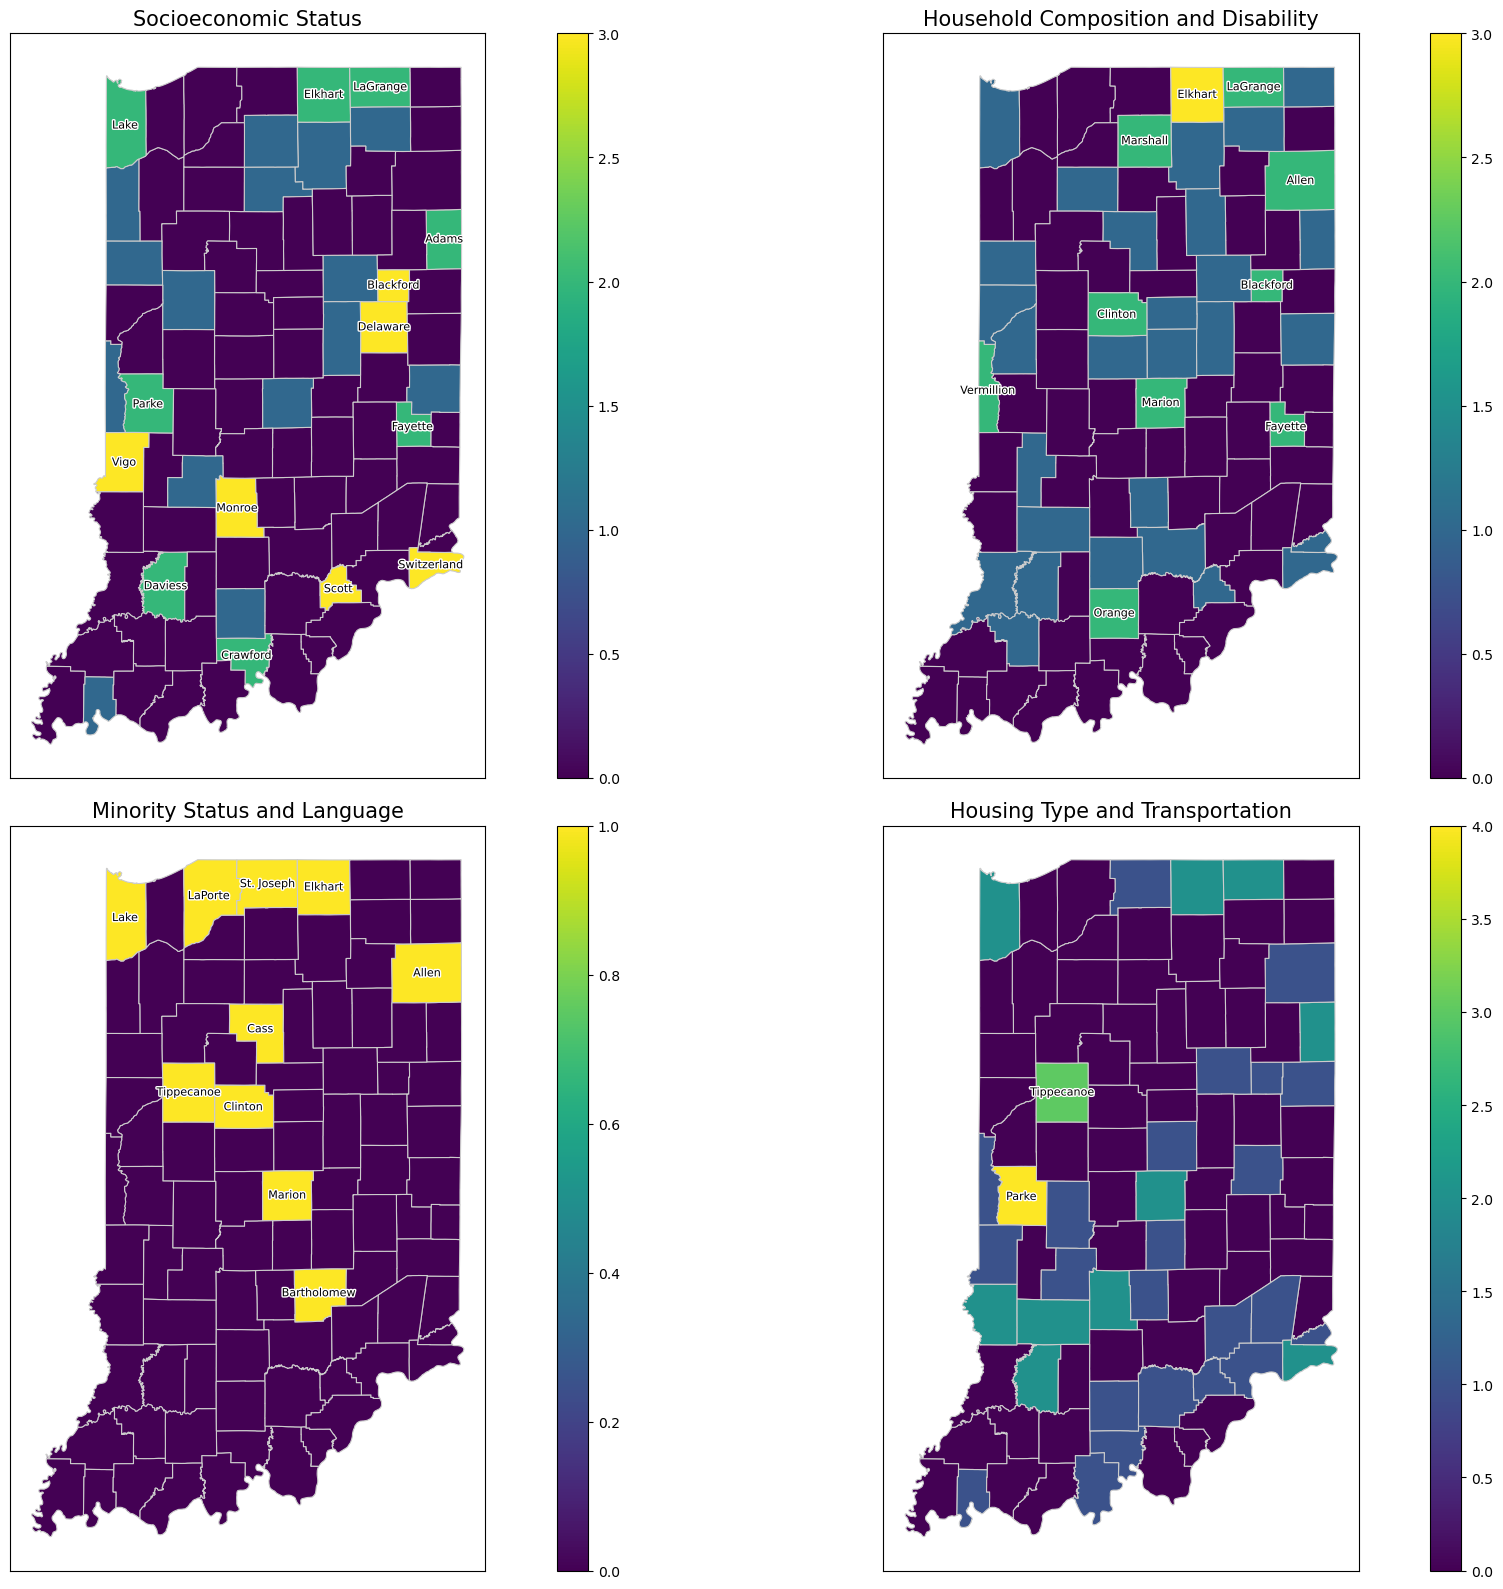

In [119]:
### SMALL MULTIPLES WITH COUNTY LABELS

import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(2, 2, figsize=(20, 16))

# Flatten axes for easy iteration
ax = ax.flatten()

# Set up the color map
cmap = 'viridis'

# List of column names and titles
columns = ['F_THEME1_map', 'F_THEME2_map', 'F_THEME3_map', 'F_THEME4_map']
titles = ['Socioeconomic Status', 'Household Composition and Disability', 'Minority Status and Language', 'Housing Type and Transportation']
thresholds = [1.5, 1.5, 0.6, 2]

# Plot each theme in a subplot
for i in range(4):
    # Select counties where theme value is above the threshold
    merged_selected = merged[merged[columns[i]] > thresholds[i]]
    
    # Create a divider for the sidebar and append it to the axes
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right", size="5%", pad=0.0001)
    
    # Plot data
    merged.plot(column=columns[i], cmap=cmap, linewidth=0.8, ax=ax[i], edgecolor='0.8', legend=True, cax=cax)
    
    # Add county labels with black outlines for selected counties
    for x, y, label in zip(merged_selected.geometry.centroid.x, merged_selected.geometry.centroid.y, merged_selected.index):
        text = ax[i].annotate(label, 
                            xy=(x, y), 
                            xytext=(0,0), 
                            textcoords="offset points", 
                            ha='center', 
                            va='center', 
                            fontsize=8, 
                            color='black')
        text.set_path_effects([pe.withStroke(linewidth=2, foreground='white')])
    
    # Hide x and y axis ticks
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
    # Set title
    ax[i].set_title(titles[i], fontsize=15)
    
plt.tight_layout()
plt.show()


/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/2987168053.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = merged.centroid


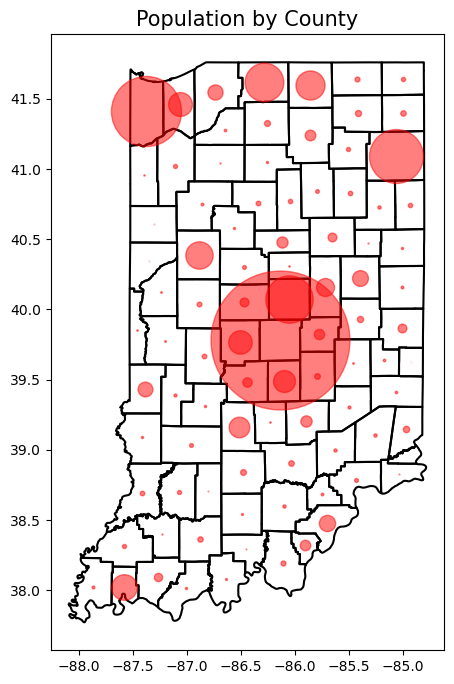

In [29]:
##### EXAMINING POPULATION AND SVI

### POPULATION SIZES AS DOTS

import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Calculate centroids
centroids = merged.centroid
population = merged['E_TOTPOP_map']

# Normalize population for symbol sizes
population_norm = (population - population.min()) / (population.max() - population.min())

fig, ax = plt.subplots(1, figsize=(10, 8))

# Draw county boundaries
merged.boundary.plot(ax=ax, color='Black')

# Draw centroids
for point, pop in zip(centroids, population_norm):
    plt.plot(point.x, point.y, 'o', markersize=pop*100, color='red', alpha=0.5) # Set transparency to 50%

plt.title('Population by County', fontsize=15)
plt.show()

/var/folders/pg/wxzj7cy16fj1s4yd9qdqzt640000gn/T/ipykernel_36480/1561235952.py:14: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




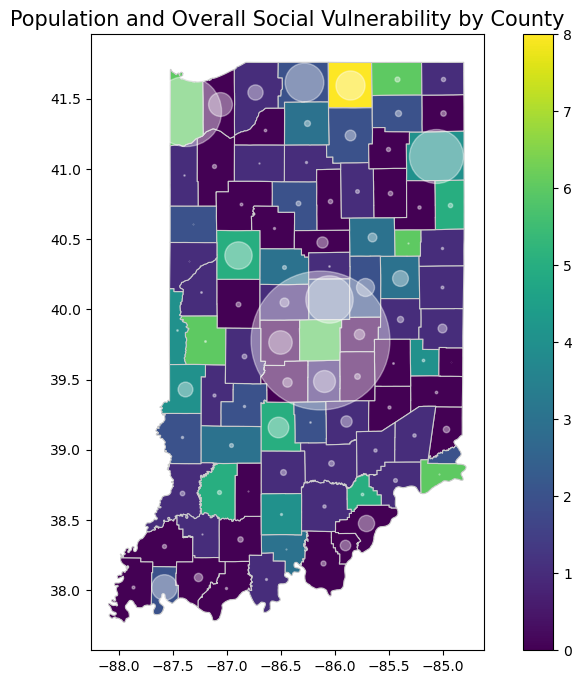

In [120]:
# This helps us see the differences in population size, but now we can't see the SVI. 
# So now I will try to combine those plots. 

import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Indiana counties shapefile
map_df = gpd.read_file(r'/Users/rachelfilippone/Desktop/Indiana_COUNTY/SVI2020_INDIANA_county.shp')

# Merge the dataframes on the county name
merged = map_df.set_index('COUNTY').join(df_indiana.set_index('COUNTY'), lsuffix='_map', rsuffix='_svi')

# Calculate centroids
centroids = merged.centroid
population = merged['E_TOTPOP_map']

# Normalize population for symbol sizes
population_norm = (population - population.min()) / (population.max() - population.min())

fig, ax = plt.subplots(1, figsize=(10, 8))

# Draw the choropleth map
merged.plot(column='F_TOTAL_map', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Draw centroids
for point, pop in zip(centroids, population_norm):
    plt.plot(point.x, point.y, 'o', markersize=pop*100, color='white', alpha=0.4) # Set transparency to 50%

plt.title('Population and Overall Social Vulnerability by County', fontsize=15)
plt.show()

In [ ]:
# This is kind of interesting, and it shows that there might be a bit of a positive relationship between 
# population size and SVI. But this plot has some occlusion problems and is just generally not visually appealing.
# A better solution might be a cartogram.

/Users/rachelfilippone/anaconda3/lib/python3.10/site-packages/geoplot/geoplot.py:248: UserWarning:

Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".



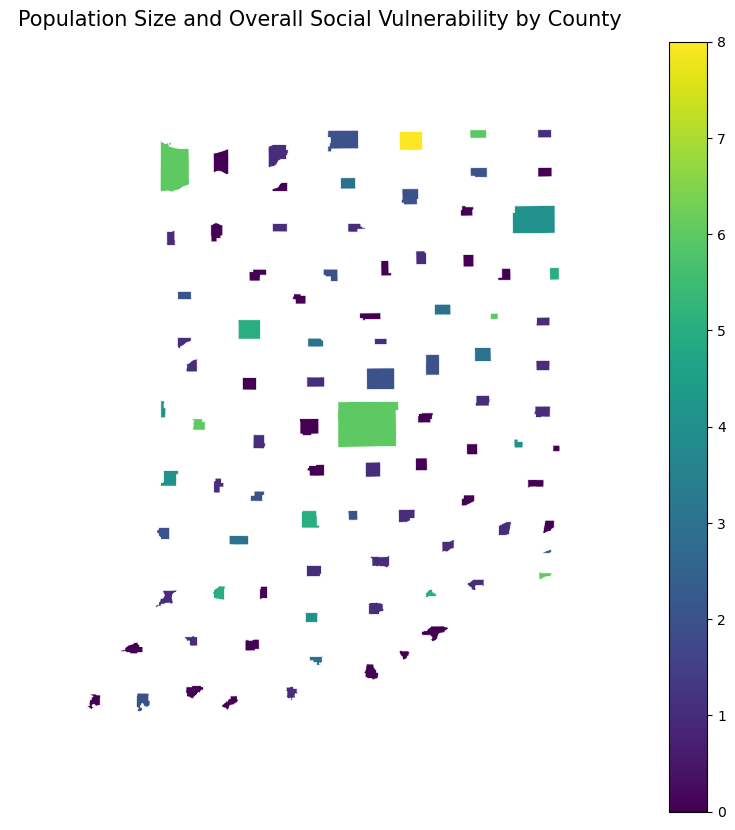

In [123]:
### CARTOGRAM

fig, ax = plt.subplots(figsize=(10, 10))  # Increase figure size
gplt.cartogram(merged, 
               scale='E_TOTPOP_map', 
               hue='F_TOTAL_map', 
               cmap='viridis', 
               linewidth=0.5, 
               edgecolor='white',
               legend=True,
               ax=ax)

plt.title('Population Size and Overall Social Vulnerability by County', fontsize=15, pad=20)
plt.show()

In [ ]:
# This shows us something very different from the choropleth. In the choropleth, it looks like most of 
# Indiana is doing relatively fine because a lot of the counties have low SVI. However, the cartogram shows that 
# a lot of the counties with the highest SVI are also some of the most populated counties in Indiana. This means 
# that there are more people living in a high level of vulnerability than we might realize by simply looking at
# choropleths.

/Users/rachelfilippone/anaconda3/lib/python3.10/site-packages/geoplot/geoplot.py:248: UserWarning:

Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".



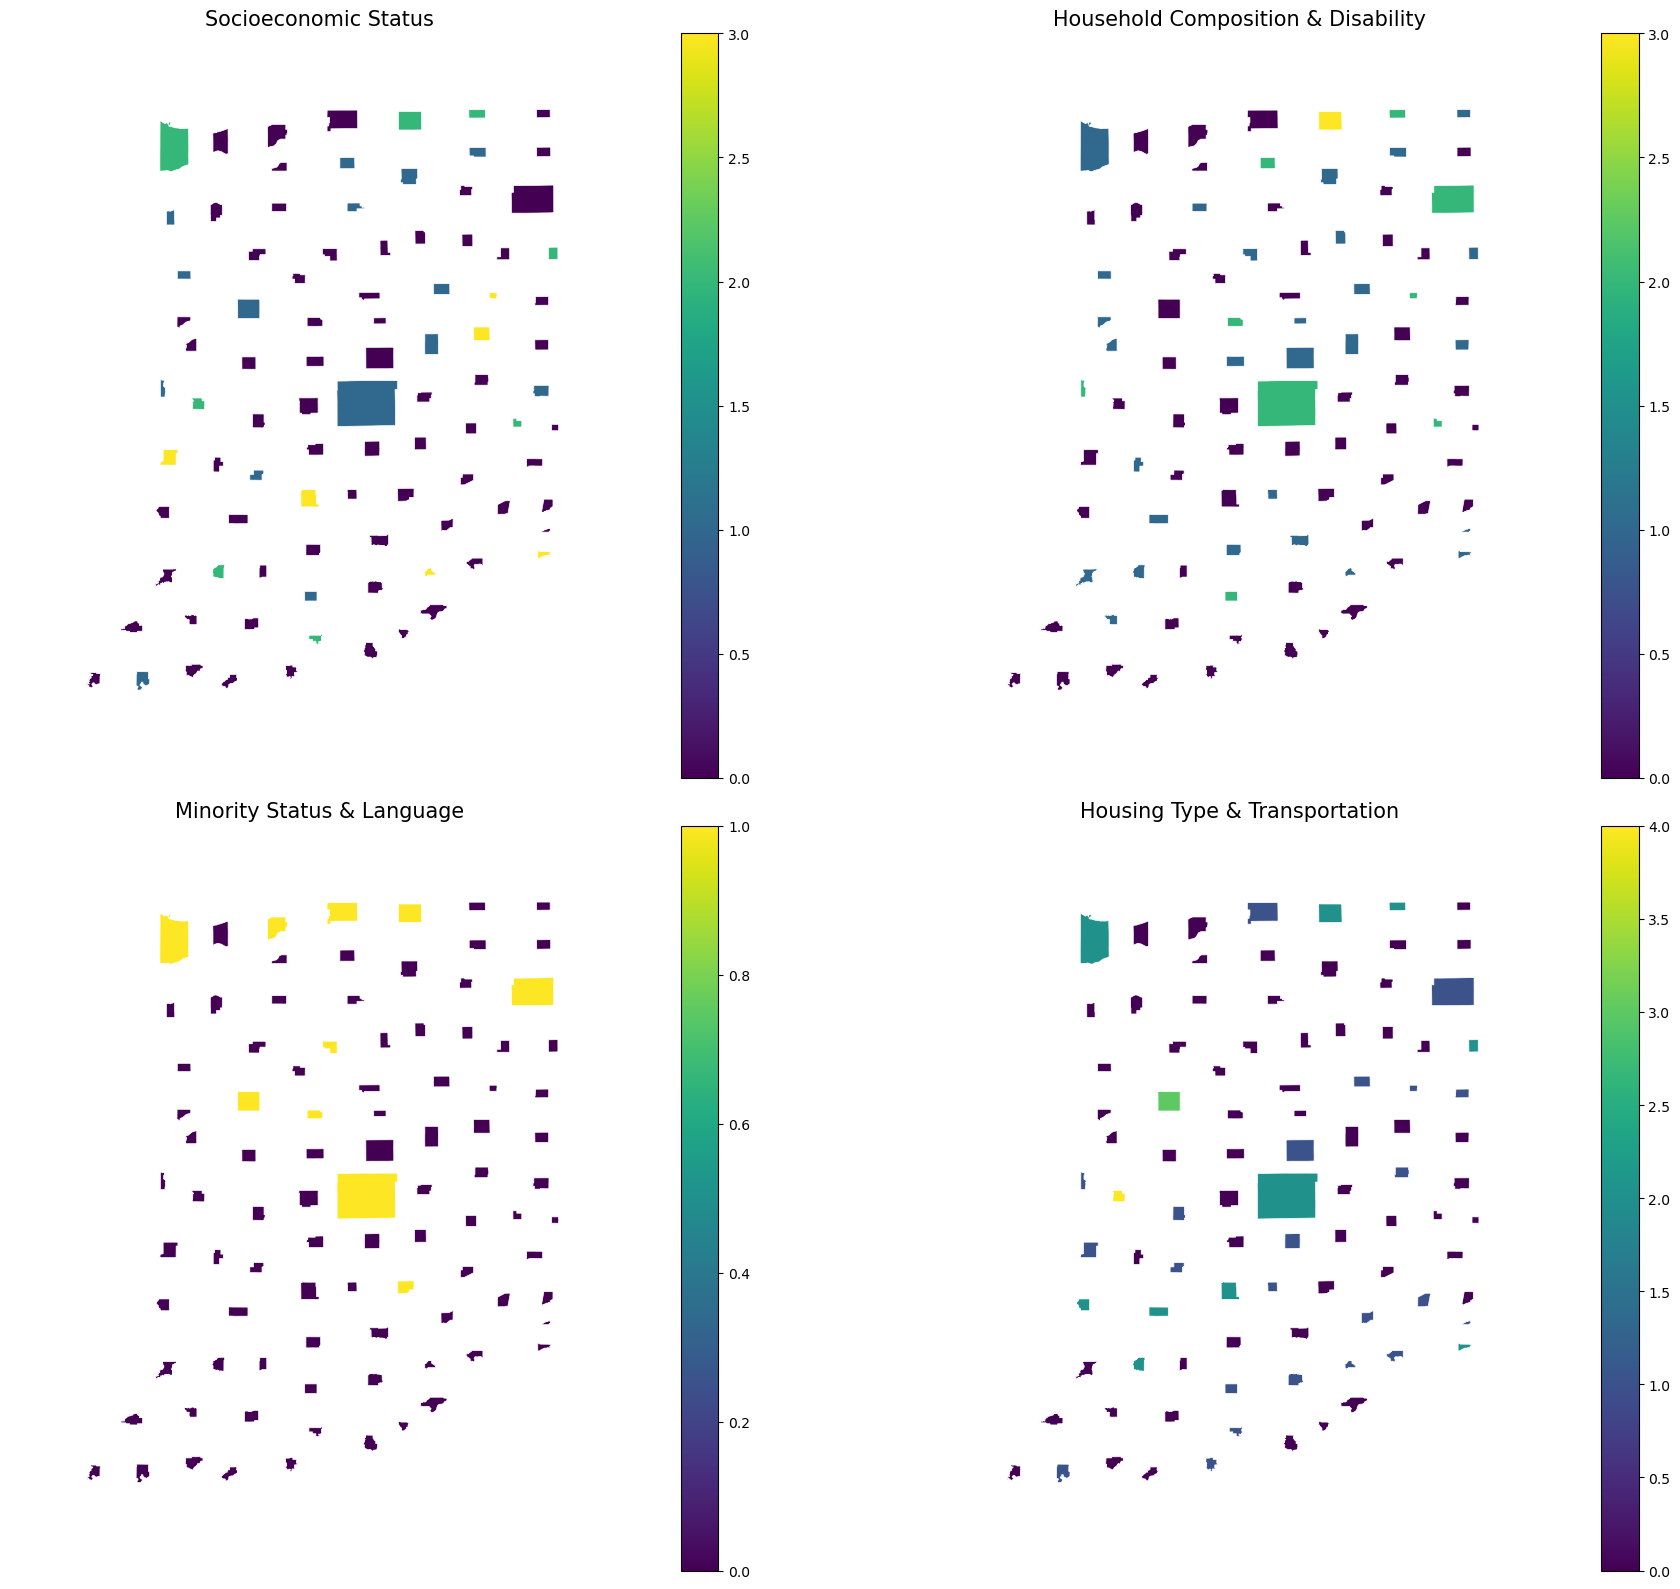

In [121]:
# SMALL MULTIPLES OF CARTOGRAMS

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(2, 2, figsize=(20, 16))

# Set up the color map
cmap = 'viridis'

# List of column names and titles
columns = ['F_THEME1_map', 'F_THEME2_map', 'F_THEME3_map', 'F_THEME4_map']
titles = ['Socioeconomic Status', 'Household Composition & Disability', 'Minority Status & Language', 'Housing Type & Transportation']

# Flatten axes for easy iteration
ax = ax.flatten()

# Plot each theme in a subplot
for i in range(4):
    gplt.cartogram(merged, 
                   scale='E_TOTPOP_map', 
                   hue=columns[i], 
                   cmap=cmap, 
                   linewidth=0.5, 
                   edgecolor='white',
                   legend=True,
                   ax=ax[i])
    ax[i].set_title(titles[i], fontsize=15)

plt.tight_layout()
plt.show()
